# **Bike Sharing Assignment:**
#Problem Statement:
BoomBikes, a US-based bike-sharing provider, has experienced a significant revenue decline due to the ongoing Covid-19 pandemic and lockdowns.

They have contracted a consulting company to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

*   Which variables are significant in predicting the demand for shared bikes.
*   How well those variables describe the bike demands



## **Importing Necessary Libraries**

In [260]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error

## **Data Reading and Understanding**

In [82]:
# Load the data
df = pd.read_csv('/content/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [25]:
# Check the shape
df.shape

(730, 16)

In [4]:
# Check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Check for null values
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
# Describe the columns in the dataset
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## **Data Cleaning\**

* 'instant' is not needed since it is just serial number of the dataset.
* 'dtday' can be dropped because it is already explained by other features like: yr, mnth, weekday, workingday and holiday.
* 'casual' and 'registered' can be dropped since 'cnt' includes these both counts and it is the target variable.
* There are no null values. So we don't need to do any missing value treatment.

In [83]:
# Drop 'instant','dtday','casual','registered' from dataframe
df = df.drop(['instant','dteday','casual','registered'], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [84]:
# Map the categorical columns to their respective categorical values
category_variable_dict = {
   'season': {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'},
   'mnth': { 1 : "January", 2 : "February", 3 : "March", 4 : "April", 5 : "May", 6 : "June", 7 : "July", 8 : "August", 9 : "September", 10 : "October", 11 : "November", 12 : "December"},
   'weekday': {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'},
   'weathersit': {1:'Clear', 2:'Misty & Cloudy', 3:'Light Snow & Rain', 4:'Heavy Rain'}
}

for category in category_variable_dict:
   df[category] = df[category].map(category_variable_dict[category])


In [85]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Misty & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Misty & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## **Data Visualization and EDA**

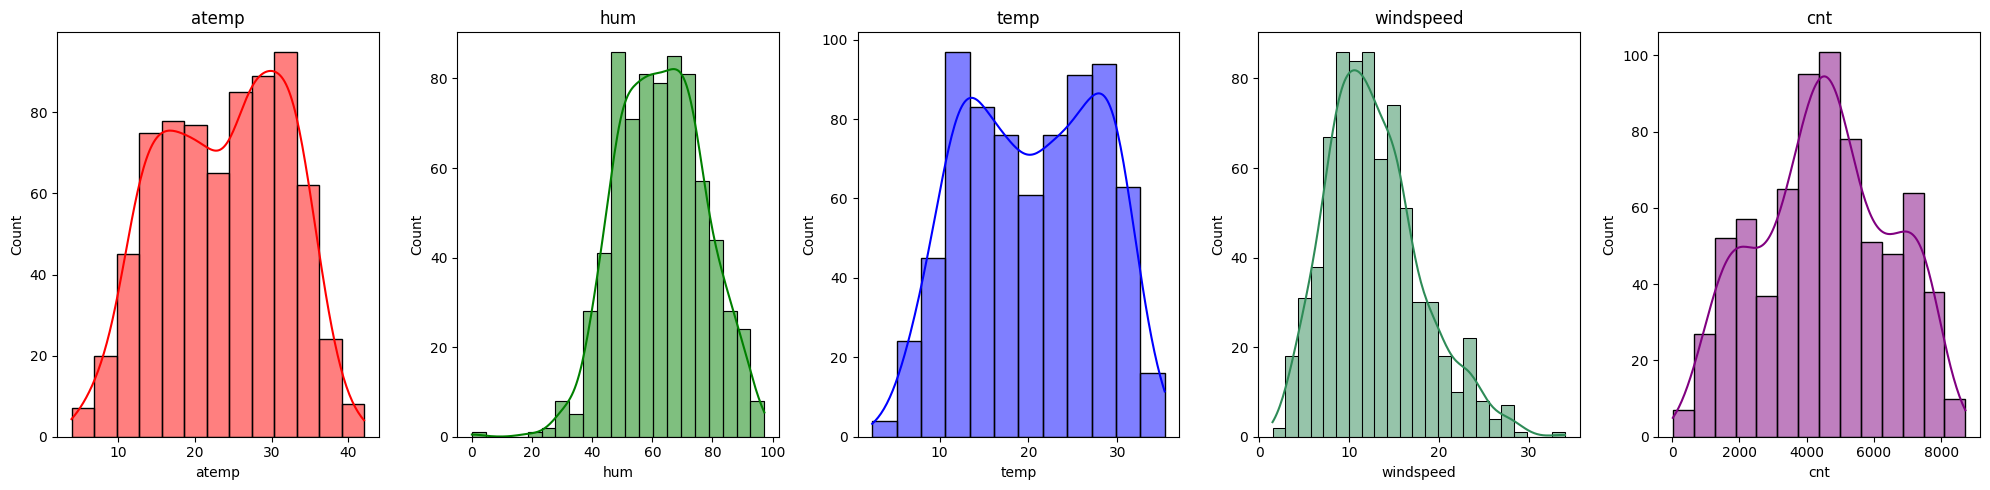

In [86]:
# Univariate Analysis
# Analysing the continuous (numerical) variables

cont_config = {
    'atemp': {'color': 'red'},
    'hum': {'color': 'green'},
    'temp': {'color': 'blue'},
    'windspeed': {'color': 'seagreen'},
    'cnt': {'color': 'purple'}
}

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for i, (col, config) in enumerate(cont_config.items()):
    sns.histplot(data=df, x=col, ax=axes[i], color=config['color'], kde=True)
    axes[i].set_title(col) #added title for better readability

plt.tight_layout() #added to prevent overlapping titles and labels
plt.show()

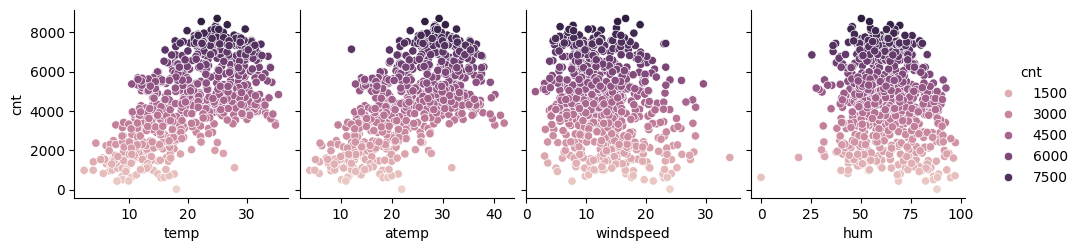

In [87]:
# Bivariate Analysis
# Plotting numerical variables
sns.pairplot(data = df, x_vars = ["temp",'atemp', 'windspeed',"hum"] , y_vars = ['cnt'], hue = 'cnt')
plt.show()

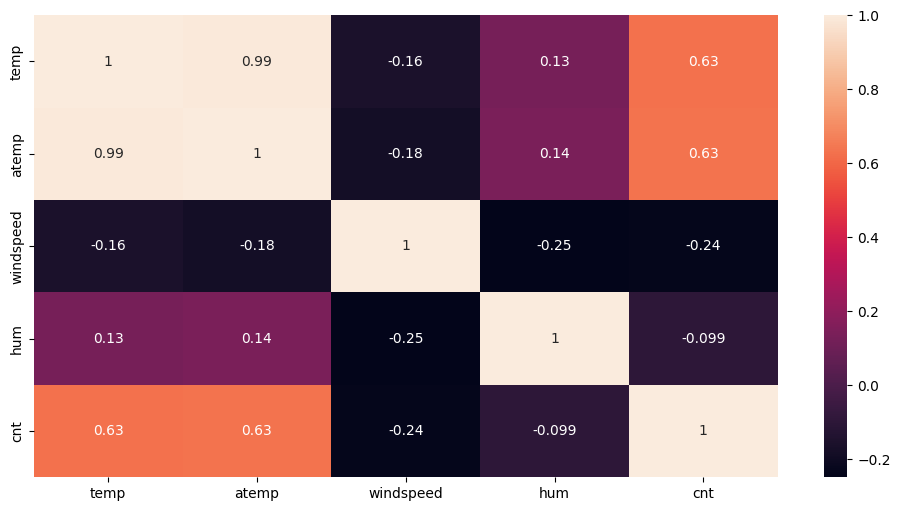

In [88]:
# Checking correlation of numerical variables
plt.figure(figsize = (12,6))
sns.heatmap(df[["temp",'atemp', 'windspeed',"hum",'cnt']].corr(),annot =True)
plt.show()

### **Summary**

*   temp and atemp are highly correlated
*   temp and atemp are having high positive correlation with target variable cnt
*   cnt has a negative relationship with humidity and windspeed.
*   There is linear correlation between temp and atemp but Both of the parameters cannot be used in the model due to multicolinearity.





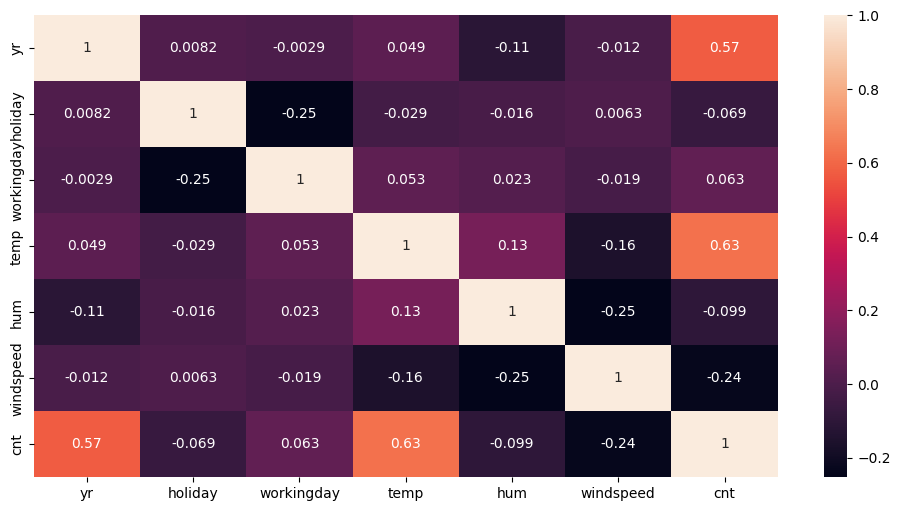

In [89]:
# Dropping the 'atemp' column as it is highly correlated with 'temp'
df.drop('atemp', axis=1, inplace=True)

# Calculating Correlation
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize = (12,6))

# Drawing Heatmap of correlation
sns.heatmap(correlation_matrix, annot=True)
plt.show()

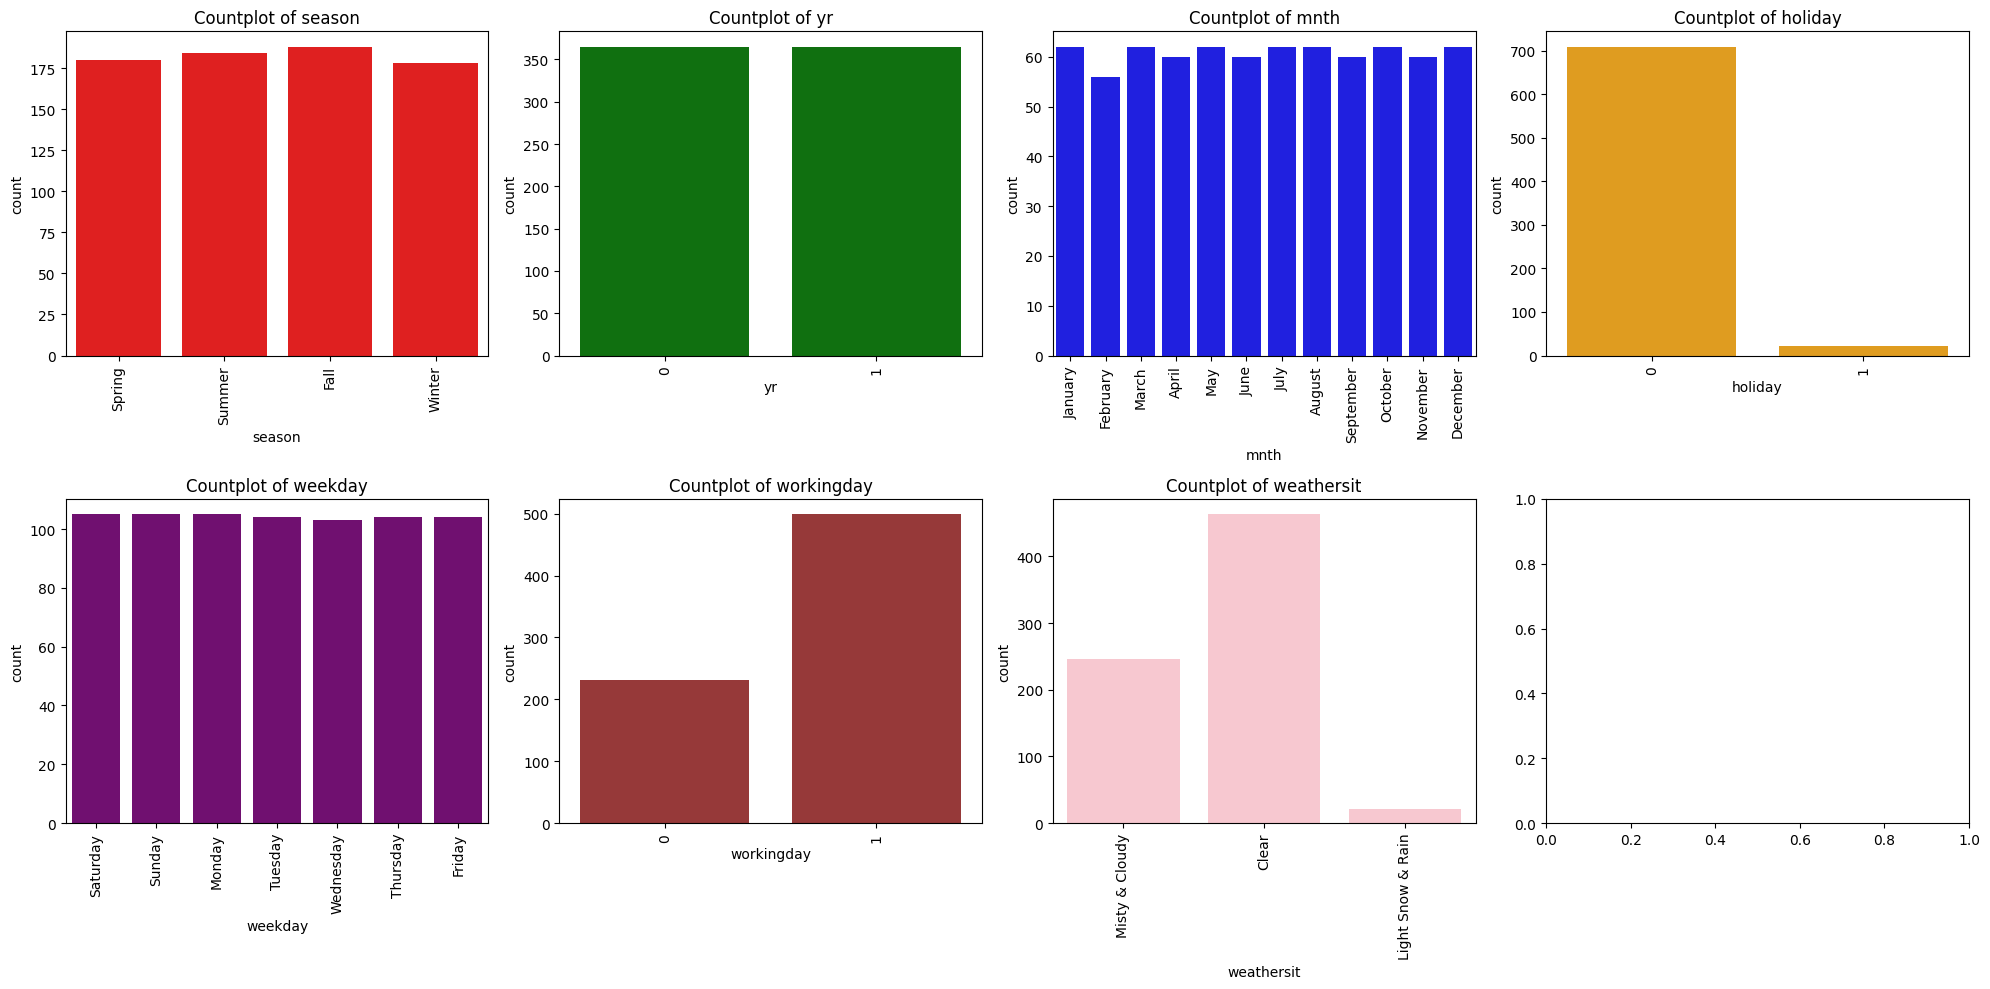

In [90]:
# Univariate analysis for categorical columns
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink'] #add more colors if needed

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i], color=colors[i % len(colors)]) #cycle through colors
    axes[i].set_title(f'Countplot of {col}')
    axes[i].tick_params(axis='x', rotation=90)


plt.tight_layout()
plt.show()

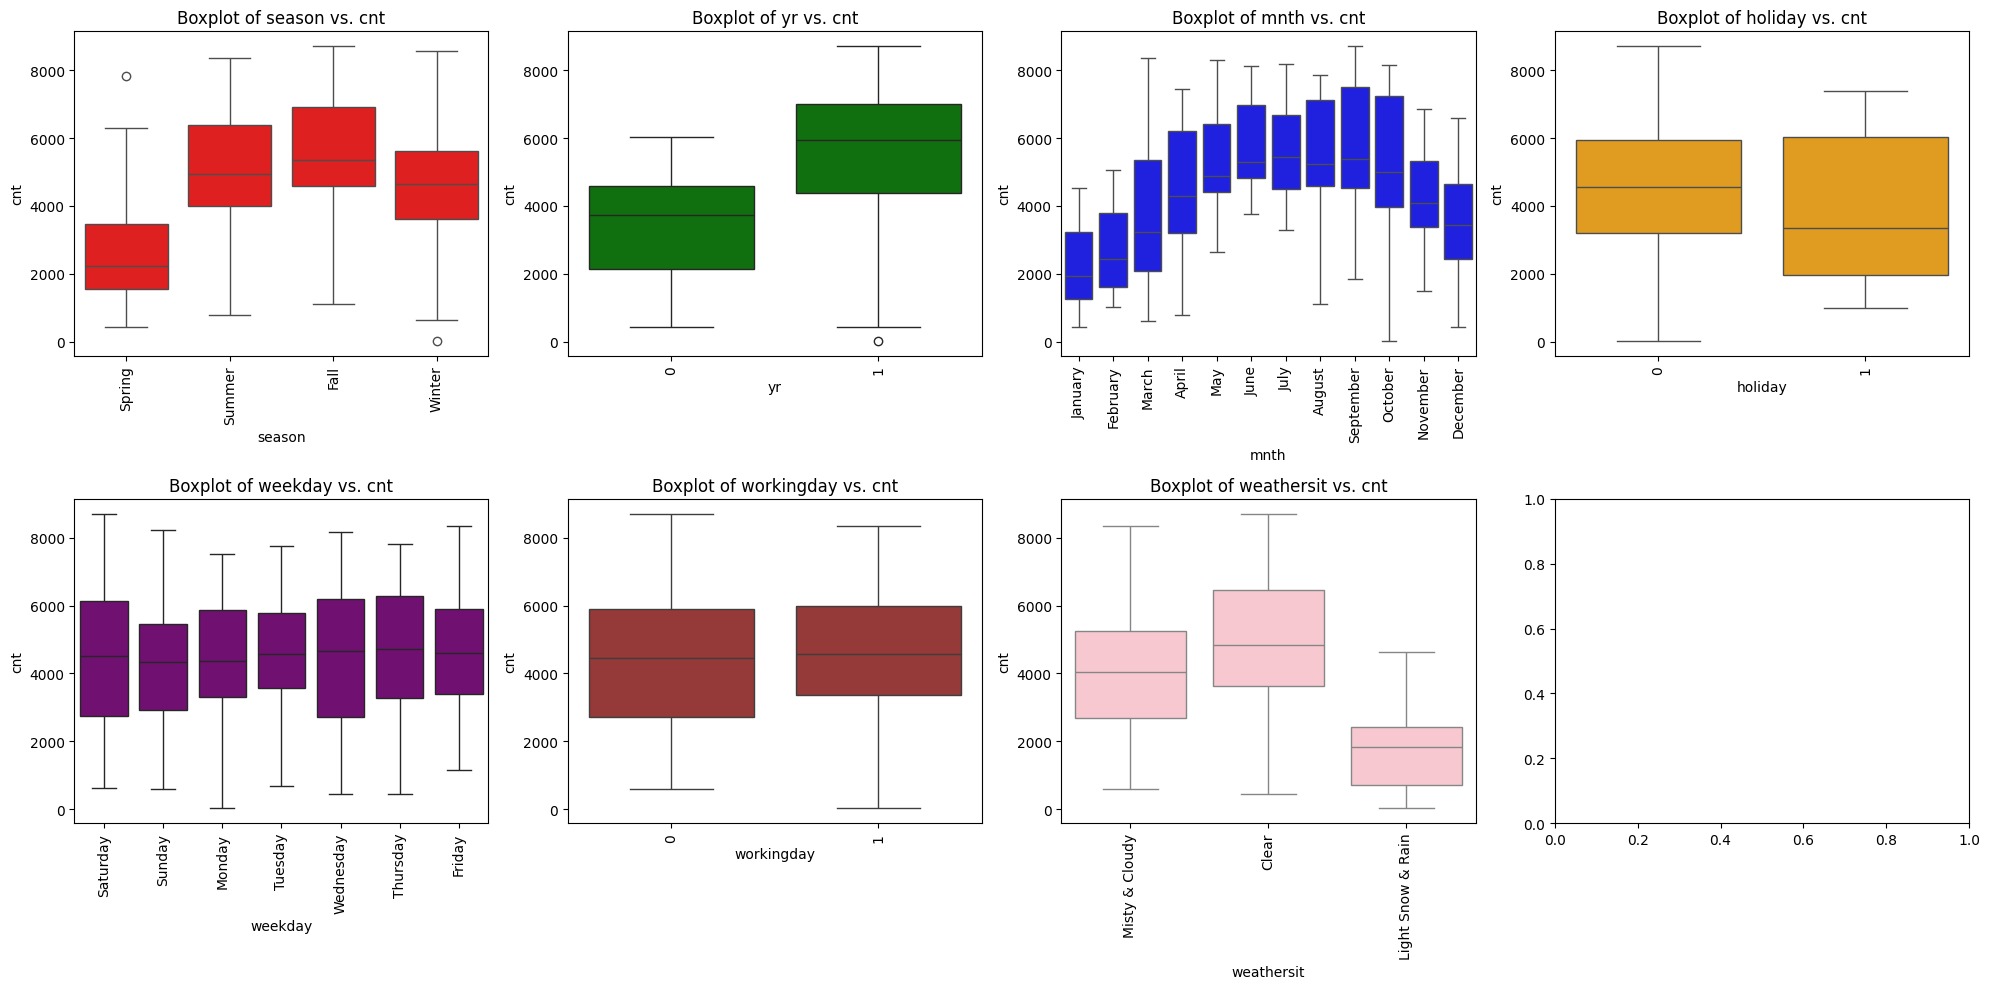

In [91]:
# Bivariate analysis for categorical columns with the target variable 'cnt'
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'] #added more colors

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.boxplot(x=col, y='cnt', data=df, ax=axes[i], color=colors[i % len(colors)])
    axes[i].set_title(f'Boxplot of {col} vs. cnt')
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

### **Summary**
*   The demand for rental bikes peaks in the Fall season followed by Summer and demand is least in Spring.
*   The demand for rental bikes increases consistently every month leading up to June, peaks in September, and then starts to decline till December.
*   The demand for rental bikes is high in 2019 compared to 2018.
*   The demand for rental bikes decrease on holidays.
*   There isn't much variation in demand during weekdays and working days.
*   The demand is very low on light snow and rainy days and high on Clear days.







## **Data Preparation**

In [92]:
# Create dummy variables for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df.mnth,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [93]:
# Concatenate the dummy variables with the original dataframe
df_new =  pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

# Drop the original categorical columns
df_new = df_new.drop(['mnth','weekday','weathersit','season'],axis=1)

# Display the updated DataFrame
df_new.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,August,December,February,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow & Rain,Misty & Cloudy,Spring,Summer,Winter
0,0,0,0,14.110847,80.5833,10.749882,985,False,False,False,...,True,False,False,False,False,False,True,True,False,False
1,0,0,0,14.902598,69.6087,16.652113,801,False,False,False,...,False,True,False,False,False,False,True,True,False,False
2,0,0,1,8.050924,43.7273,16.636703,1349,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0,0,1,8.200000,59.0435,10.739832,1562,False,False,False,...,False,False,False,True,False,False,False,True,False,False
4,0,0,1,9.305237,43.6957,12.522300,1600,False,False,False,...,False,False,False,False,True,False,False,True,False,False


In [94]:
# Convert boolean columns to numeric (0 and 1)
for col in df_new.select_dtypes(include=['bool']):
    df_new[col] = df_new[col].astype(int)

In [95]:
# check the shape of new dataframe
df_new.shape

(730, 29)

In [96]:
# check the column info of new dataframe
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr                 730 non-null    int64  
 1   holiday            730 non-null    int64  
 2   workingday         730 non-null    int64  
 3   temp               730 non-null    float64
 4   hum                730 non-null    float64
 5   windspeed          730 non-null    float64
 6   cnt                730 non-null    int64  
 7   August             730 non-null    int64  
 8   December           730 non-null    int64  
 9   February           730 non-null    int64  
 10  January            730 non-null    int64  
 11  July               730 non-null    int64  
 12  June               730 non-null    int64  
 13  March              730 non-null    int64  
 14  May                730 non-null    int64  
 15  November           730 non-null    int64  
 16  October            730 non

## **Data Modelling**

In [249]:
# Splitting the data into training and testing Sets
np.random.seed(0)
df_train,df_test = train_test_split(df_new,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [215]:
# Apply StandardScaler to continuous variables
scaler = StandardScaler()

num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,August,December,February,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow & Rain,Misty & Cloudy,Spring,Summer,Winter
576,1,0,1,1.230870,0.515796,-0.331282,1.401236,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,-0.421238,-0.070634,-0.386359,-0.215182,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,-1.295618,-1.046051,2.017388,-1.380030,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,-0.628327,-1.001847,-0.780539,-0.136157,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,-0.849222,0.695551,0.354275,-1.438016,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [216]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,August,December,February,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow & Rain,Misty & Cloudy,Spring,Summer,Winter
count,510.000000,510.000000,510.000000,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,-2.803857e-16,-1.811187e-16,9.055937e-17,1.602204e-16,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,-2.381884e+00,-4.464419e+00,-1.891589e+00,-2.290356e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-8.756866e-01,-7.675694e-01,-7.174407e-01,-7.006211e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,2.285273e-02,2.219277e-02,-1.421889e-01,2.291863e-02,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,8.765214e-01,7.161828e-01,5.515521e-01,7.636488e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,2.050027e+00,2.398847e+00,4.003357e+00,2.169933e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [217]:
# Preparation of Training Dataset
y_train = df_train.pop('cnt')
X_train = df_train

In [218]:
# Feature selection using RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)


In [219]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', False, 5),
 ('windspeed', False, 3),
 ('August', False, 6),
 ('December', True, 1),
 ('February', True, 1),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('March', False, 14),
 ('May', False, 4),
 ('November', True, 1),
 ('October', False, 12),
 ('September', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', False, 7),
 ('Thursday', False, 10),
 ('Tuesday', False, 9),
 ('Wednesday', False, 11),
 ('Light Snow & Rain', True, 1),
 ('Misty & Cloudy', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 2),
 ('Winter', True, 1)]

In [220]:
# Get the columns which are selected using RFE approach
selected_features = X_train.columns[rfe.support_]
selected_features

Index(['yr', 'holiday', 'workingday', 'temp', 'December', 'February',
       'January', 'July', 'November', 'September', 'Saturday',
       'Light Snow & Rain', 'Misty & Cloudy', 'Spring', 'Winter'],
      dtype='object')

In [221]:
# Get the columns which are rejected using RFE approach
rejected_features = X_train.columns[~rfe.support_]
rejected_features

Index(['hum', 'windspeed', 'August', 'June', 'March', 'May', 'October',
       'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Summer'],
      dtype='object')

In [222]:
# Running the model with selected features
X_train_rfe = X_train[selected_features]

# Adding constant
X_train_new = sm.add_constant(X_train_rfe)

# Create Object for the Model
lm1 = sm.OLS(y_train, X_train_new).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     163.4
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.03e-180
Time:                        11:05:56   Log-Likelihood:                -268.43
No. Observations:                 510   AIC:                             568.9
Df Residuals:                     494   BIC:                             636.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.4502      0.06

In [223]:
# Calculate VIF for the selected features
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.22
14,Spring,3.44
4,temp,3.34
15,Winter,2.28
7,January,2.21
3,workingday,1.87
6,February,1.83
11,Saturday,1.77
9,November,1.75
5,December,1.55


'February' has high p-value, so dropping it.

In [224]:
X_train_m1 = X_train_rfe.drop(['February'],axis=1)
X_train_m1.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'December', 'January', 'July',
       'November', 'September', 'Saturday', 'Light Snow & Rain',
       'Misty & Cloudy', 'Spring', 'Winter'],
      dtype='object')

In [225]:
# Add constant to all the Variables
X_train_sm = sm.add_constant(X_train_m1)

# Create Object for the Model
lm2 = sm.OLS(y_train, X_train_sm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          5.16e-181
Time:                        11:06:11   Log-Likelihood:                -269.71
No. Observations:                 510   AIC:                             569.4
Df Residuals:                     495   BIC:                             632.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.4574      0.06

In [226]:
# Again Checking the VIF Score
vif = pd.DataFrame()
vif['Features'] = X_train_m1.columns
vif['VIF'] = [variance_inflation_factor(X_train_m1.values,i) for i in range(X_train_m1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
12,Spring,3.08
3,temp,2.98
2,workingday,2.82
13,Winter,2.74
0,yr,1.89
7,November,1.87
5,January,1.75
4,December,1.55
11,Misty & Cloudy,1.53
9,Saturday,1.42


Remove 'holiday' 'November','December' and 'January' because iof their high p-values

In [227]:
X_train_m2 = X_train_m1.drop(['holiday','December','January','November'],axis=1)
X_train_m2.columns

Index(['yr', 'workingday', 'temp', 'July', 'September', 'Saturday',
       'Light Snow & Rain', 'Misty & Cloudy', 'Spring', 'Winter'],
      dtype='object')

In [228]:
# Add constant to all the Variables
X_train_sm = sm.add_constant(X_train_m2)

# Create Object for the Model
lm3 = sm.OLS(y_train, X_train_sm).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     236.9
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.47e-182
Time:                        11:06:30   Log-Likelihood:                -277.69
No. Observations:                 510   AIC:                             577.4
Df Residuals:                     499   BIC:                             624.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5143      0.05

In [229]:
# Again Checking the VIF Score
vif = pd.DataFrame()
vif['Features'] = X_train_m2.columns
vif['VIF'] = [variance_inflation_factor(X_train_m2.values,i) for i in range(X_train_m2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
8,Spring,2.71
1,workingday,2.65
2,temp,2.62
0,yr,1.87
9,Winter,1.80
7,Misty & Cloudy,1.52
5,Saturday,1.37
3,July,1.36
4,September,1.17
6,Light Snow & Rain,1.07


### **Summary**
*  Prob(F-statistic) is very low Which tells Overall model is a good Fit.
*  We got quite Good Adjusted R2 Score i.e 82.3%
*  All the P Value are less than 0.05 and VIF are less than 5, Which say that all the 10 Features are Statistically Significant

Hence we can go ahead with the current Model for Prediction and Evaluation.



## **Residual Analysis**

In [231]:
lm3.params

,0
const,-0.514312
yr,1.041304
workingday,0.246395
temp,0.472110
July,-0.294438
September,0.276100
Saturday,0.284320
Light Snow & Rain,-1.353498
Misty & Cloudy,-0.354752
Spring,-0.504047


In [232]:
# Calculate y_train_pred
y_train_pred = lm3.predict(X_train_sm)

<Figure size 800x500 with 0 Axes>

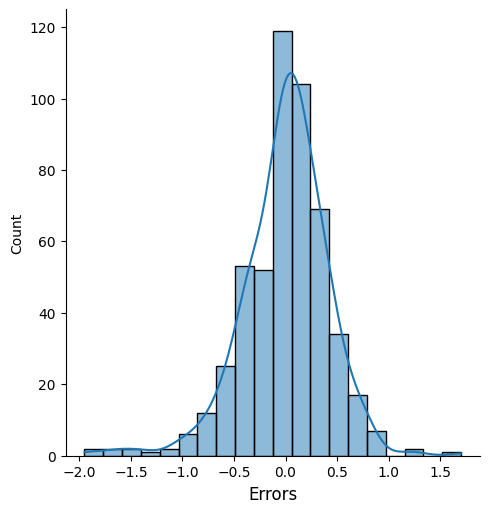

In [234]:
# Calculate Error Terms and Plot the histogram
res = (y_train - y_train_pred)

fig = plt.figure(figsize = (8, 5))
sns.displot(res, bins = 20, kde = True)
plt.xlabel('Errors', fontsize = 12)
plt.show()

Error Terms are normally Distributed with mean Zero. Hence Model is obeying the assumption of Normality.

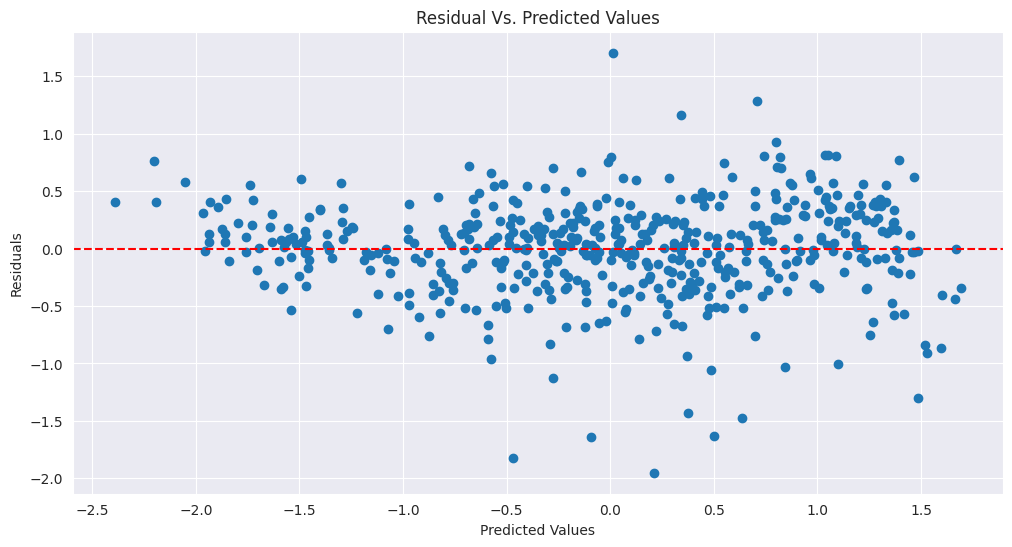

In [236]:
# Homoscedasticity Check
plt.figure(figsize = (12,6))
plt.scatter(y_train_pred,res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

The variance of residuals is constant and there is no specific pattern. Hence we can say error terms are independent of each other

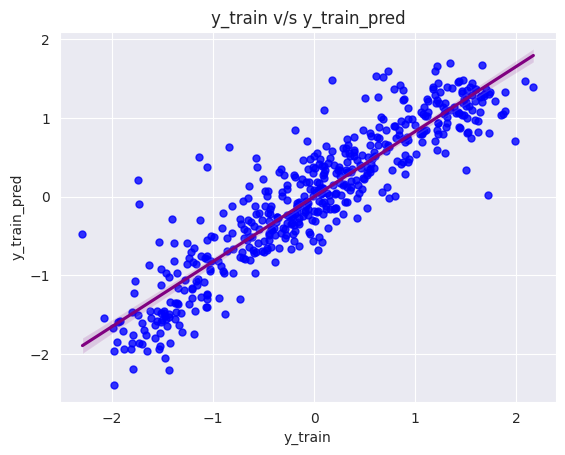

In [239]:
# Visualize the trained model
sns.regplot(x = y_train, y = y_train_pred, line_kws = { 'color': 'purple' }, scatter_kws = { 's' : 25, 'color': 'blue' })

# Show the plot
plt.title('y_train v/s y_train_pred')
plt.xlabel('y_train')
plt.ylabel('y_train_pred')
plt.show()

In [242]:
# Calculate mean squared error of the training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate RMSE
rmse_train = np.sqrt(mse_train)

print(rmse_train)

0.41709475664778184


We can see Error Terms have approximatly constant Variance, Hence it follows the Assumption of Homoscedasticity.

All the linear model's assumptions hold true, indicating it is well-trained model and ready for testing.


## **Model Evaluation**

In [250]:
# Applying scaling on the test dataset

num_vars = ['temp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,August,December,February,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow & Rain,Misty & Cloudy,Spring,Summer,Winter
184,0,1,0,1.304506,0.047244,-1.395126,0.799313,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,1.612837,-0.276917,-0.985373,0.885522,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,-0.112907,1.284930,0.078536,-0.937183,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,1.525401,-1.464502,0.110155,0.151206,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,1.240076,-2.307309,1.276437,0.247678,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [251]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,August,December,February,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow & Rain,Misty & Cloudy,Spring,Summer,Winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.094304,-0.084140,-0.044745,0.038600,0.059091,0.086364,0.100000,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,1.033465,1.020528,0.940739,0.977532,0.236333,0.281541,0.300684,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,-2.175395,-2.666825,-2.143940,-2.075347,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-0.806655,-0.832398,-0.719418,-0.601712,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.091882,-0.170826,-0.122362,0.049859,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.968557,0.640461,0.482415,0.732603,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.980997,2.413579,2.868429,2.006239,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [254]:
y_test = df_test.pop('cnt')
X_test = df_test

X_test = X_test[X_train_m2.columns]

In [255]:
X_test.head()

,yr,workingday,temp,July,September,Saturday,Light Snow & Rain,Misty & Cloudy,Spring,Winter
184,0,0,1.304506,1,0,0,0,1,0,0
535,1,1,1.612837,0,0,0,0,0,0,0
299,0,1,-0.112907,0,0,0,0,1,0,1
221,0,1,1.525401,0,0,0,0,0,0,0
152,0,1,1.240076,0,0,0,0,0,0,0


In [256]:
# Add constant to the test set
X_test_sm = sm.add_constant(X_test)

# Get the predicted values from the linear model
y_test_pred = lm3.predict(X_test_sm)

In [257]:
# Calculate R2 Score
r2_score_test = r2_score(y_true = y_test, y_pred = y_test_pred)
r2_score_test = round(r2_score_test, 2)
r2_score_test

0.81

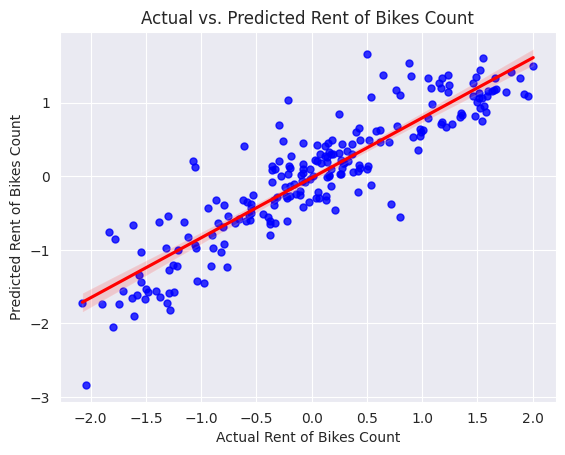

In [262]:
# Visualize the predicted model using a scatter plot with a linear regression fit line
sns.regplot(x = y_test, y = y_test_pred, line_kws = { 'color': 'red' }, scatter_kws = { 's' : 25, 'color': 'blue' })

# Show the plot
plt.title('Actual vs. Predicted Rent of Bikes Count')
plt.xlabel('Actual Rent of Bikes Count')
plt.ylabel('Predicted Rent of Bikes Count')
plt.show()

In [263]:
round(lm3.params,4)

,0
const,-0.5143
yr,1.0413
workingday,0.2464
temp,0.4721
July,-0.2944
September,0.2761
Saturday,0.2843
Light Snow & Rain,-1.3535
Misty & Cloudy,-0.3548
Spring,-0.5040


In [265]:
# Equation of the best fit line
Cofficients = round(lm3.params,2)
beta = Cofficients.sort_values(ascending = False)

for i in range(0, len(beta)):
    print(beta[i],'*',beta.index[i],end ='')
    print(' + ',end ='')

1.04 * yr + 0.47 * temp + 0.28 * September + 0.28 * Saturday + 0.25 * workingday + 0.24 * Winter + -0.29 * July + -0.35 * Misty & Cloudy + -0.5 * Spring + -0.51 * const + -1.35 * Light Snow & Rain + 

For our model, the best fit line is determined by the following equation:

 **cnt = 1.04 * year + 0.47 * temp + 0.28 * September + 0.28 * Saturday + 0.25 * workingday + 0.24 * Winter  -0.29 * July  -0.35 * Misty & Cloudy  -0.5 * Spring   -1.35 * Light Snow & Rain  -0.51**


In [268]:
# Get R2 Score for Training set
r2_score_train = round(lm3.rsquared, 2)

# Print the R2 and Adjusted R2 scores for the training and the test set
print(f'Training Set: \tR2 - {format(r2_score_train, ".3f")}')
print(f'Test Set: \tR2 - {format(r2_score_test, ".3f")}')


Training Set: 	R2 - 0.830
Test Set: 	R2 - 0.810


The Final Model accuray is around 81%, Which is a good score. Difference between Test and Train accuracy is around 2% which is negligible.

This indicates that the model generalizes well to new data.

### **Insights**

Significant Variables for Predicting Bike Demand

*   Workingday: Positive impact on demand.
*   Temperature: Positive impact on demand.
*   Year: Positive impact on demand.
*   Seasons: Winter has high demand whereas Spring has low demand.
*  Months: September show significant demand and July show negative demand.
*  Weather Situation: Bad and moderate weather conditions affect demand.









